# **Hamoye Premier Project (Team Github)**

* ## Project Code :PP22/J611

* ## Project Scope : Jobs and Careers 

* ## Project Aim : Predicting the burn rate of employees.



































##Project Context


>Understanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. How are employees' Burn Rate affected based on various conditions provided.



========================================================================================================

### Importing Neccessary libraries for the Project

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import set_printoptions
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score

import xgboost
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, BatchNormalization


import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline 
plt.style.use('seaborn-darkgrid')

In [ ]:
# Initializing our dataset github link to the string 'url'
url_train = 'https://raw.githubusercontent.com/HamoyeTeamGithub/Hamoye-Premier-Project--22---PP22-J612---Team-Github--/8261b16bbbc13e7af74aae420f1734e49c6b657f/train.csv'
url_test = 'https://raw.githubusercontent.com/HamoyeTeamGithub/Hamoye-Premier-Project--22---PP22-J612---Team-Github--/8261b16bbbc13e7af74aae420f1734e49c6b657f/test.csv'

In [ ]:
#Import the dataset from link
train = pd.read_csv(url_train, sep=',')
test = pd.read_csv(url_test, sep =',')

In [ ]:
train.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


### Data Description


*   Employee ID: The unique ID allocated for each employee (example: fffe390032003000)
* Date of Joining: The date-time when the employee has joined the organization 
(example: 2008-12-30)
*Gender: The gender of the employee (Male/Female)
*Company Type: The type of company where the employee is working (Service/Product)
*WFH Setup Available: Is the work from home facility available for the employee (Yes/No)
*Designation: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.
*Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.
*In the range of [1.0, 10.0] (higher means more resource)
*Mental Fatigue Score: The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
* Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.







In [ ]:
# Initialize the train dataset we are to work to df and the test to df_test
df = train.copy()
df_test = test.copy()

In [ ]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


* We have five columns with object type (categorical columns) and four columns with the float type (numeric columns, with burn being continues).

In [ ]:
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
# To check the shape of our dataset
print('\n'f'The dataset comprises of: \n * {df.shape[0]} rows and \n * {df.shape[1]} columns''\n')


The dataset comprises of: 
 * 22750 rows and 
 * 9 columns



In [ ]:
# To bring out our column names
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

# **THE DATA CLEANING PHASE**



> **Checking for Duplicates**



In [ ]:
df.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

0



---


> There are no duplicates, both in our train set and the test set.


---





> **Checking for the Percentage Missing Values.**



In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
tmp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
tmp

,Total,Percent
Mental Fatigue Score,2117,9.305495
Resource Allocation,1381,6.070330
Burn Rate,1124,4.940659
Employee ID,0,0.000000
Date of Joining,0,0.000000
Gender,0,0.000000
Company Type,0,0.000000
WFH Setup Available,0,0.000000
Designation,0,0.000000


In [ ]:
total2 = df_test.isnull().sum().sort_values(ascending = False)
percent2 = (df_test.isnull().sum()/df_test.isnull().count()*100).sort_values(ascending = False)
tmp2 = pd.concat([total2, percent2], axis=1, keys=['Total2', 'Percent2'])
tmp2

,Total2,Percent2
Employee ID,0,0.0
Date of Joining,0,0.0
Gender,0,0.0
Company Type,0,0.0
WFH Setup Available,0,0.0
Designation,0,0.0
Resource Allocation,0,0.0
Mental Fatigue Score,0,0.0




---


> The train set has three columns with missing values.The column with most 
missing values has a missing values percentage of approximately nine percent and the least with approximately 4 percent missing values


---







> **Dealing with Missing Values**



In [ ]:
 df.dropna(how ='any', inplace = True)

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.drop('index', inplace = True, axis = 1)

In [ ]:
df.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
df_test.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [ ]:
df.shape

(18590, 9)



---

> Here we had to drop all instance with missing values and reset the index of the dataframe, the reasons for dropping and not filling in those values are 


*   The Burn rate is our target variable and the missing values for a target variable should not be filled.
*   We worked with the rule of having a tolerance mark of less than 5% missing values, and since the remaining two columns with the missing values have them greater than the 5% mark, we dropped it to avoid getting our model biased.


---



---









> **Checking the number of Unique features in each categorical column.**



In [ ]:
cat_col = ['Gender', 'Company Type', 'WFH Setup Available']
for col in cat_col:
    print('\n\n'f'The Unique values in {col} are {df[col].unique()}')
    print(f'The Value Count of the unique values in {col} are \n{df[col].value_counts()}''\n\n-----------')



The Unique values in Gender are ['Female' 'Male']
The Value Count of the unique values in Gender are 
Female    9747
Male      8843
Name: Gender, dtype: int64

-----------


The Unique values in Company Type are ['Service' 'Product']
The Value Count of the unique values in Company Type are 
Service    12174
Product     6416
Name: Company Type, dtype: int64

-----------


The Unique values in WFH Setup Available are ['No' 'Yes']
The Value Count of the unique values in WFH Setup Available are 
Yes    10030
No      8560
Name: WFH Setup Available, dtype: int64

-----------




> **Duplicate our Data**



In [ ]:
#We duplicated the dataset before commencing any manipulation on our data, so we could easily refer back to the main data if the need arise 

df2 = df.copy()



> **Seperating our 'Date of Joining' Column**



In [ ]:
df2['Date of Joining'] = pd.to_datetime(df2["Date of Joining"])

In [ ]:
df2["Month of joining"] = df2["Date of Joining"].dt.month_name()
df2["Year of joining"] = df2["Date of Joining"].dt.year
df2["Day of joining"] = df2["Date of Joining"].dt.day

In [ ]:
def move(x, y):
    col = df2.pop(x)
    df2.insert(y, x, col)
    
move("Day of joining", 1)
move("Month of joining", 2)
move("Year of joining", 3)


In [ ]:
# Since we have extrached the data we need from the Data of joining column, we will now have to drop it.

df2.drop(['Employee ID', 'Date of Joining'], axis = 1, inplace = True)

In [ ]:

df2.head(7)

,Day of joining,Month of joining,Year of joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,30,September,2008,Female,Service,No,2.0,3.0,3.8,0.16
1,30,November,2008,Male,Service,Yes,1.0,2.0,5.0,0.36
2,3,November,2008,Male,Service,Yes,1.0,1.0,2.6,0.20
3,24,July,2008,Female,Service,No,3.0,7.0,6.9,0.52
4,26,November,2008,Male,Product,Yes,2.0,4.0,3.6,0.29
5,2,January,2008,Female,Service,No,3.0,6.0,7.9,0.62
6,31,October,2008,Female,Service,Yes,2.0,4.0,4.4,0.33


# **EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION PHASE** 



---

> **Clustering employees with similiar features using pandas grouby function and noting down their behaviours**



In [ ]:
group_on_gender =df2.groupby(['Gender'])[ 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'].mean()
group_on_gender

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Gender,,,,
Female,2.060121,4.211757,5.465538,0.422938
Male,2.310867,4.789438,6.026066,0.484967




---

> From the dataframe above, we could deduce that
>> * The males seems to have a more resource allocated to them, 
*   The males also have an average higher mental fatigue score than the females
* And the males also have an average burn out range greater than the average burn out range of the females





In [ ]:
group_on_company =df2.groupby(['Company Type'])[ 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'].mean()
group_on_company

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Company Type,,,,
Product,2.165368,4.470231,5.719748,0.450835
Service,2.186792,4.495154,5.738722,0.453292



---

> From the dataframe above, we could deduce that
>> *  Those that work in a product company have lesser working hours( Resource Allocation) than those working on with a service company.
*Those with the working in a service company have an average mental fatigue score and burn out range greater than those working with a product company.

In [ ]:
group_on_workfromhome =df2.groupby(['WFH Setup Available'])[ 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'].mean()
group_on_workfromhome

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
WFH Setup Available,,,,
No,2.463785,5.118224,6.309439,0.518227
Yes,1.936690,3.947458,5.239511,0.396303



---

> From the dataframe above, we could deduce that
>> * There is a very significant gap to the working hours (resource allocation) of those who work from home (WFH) and those who don't, with those working from home with a lesser average working time than those who don't.
* The gap is also noticed the mental fatigue score and burn rate of, where those who work from home have a lesser mental fatigue score and burn rate than those who don't.

In [ ]:
group_on_gender_companytype =df2.groupby(['Gender', 'Company Type'])[ 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'].mean()
group_on_gender_companytype

Designation  Resource Allocation  Mental Fatigue Score  \
Gender Company Type                                                           
Female Product          2.051460             4.198315              5.446735   
       Service          2.064601             4.218711              5.475265   
Male   Product          2.287747             4.762367              6.013062   
       Service          2.323304             4.804000              6.033061   

                     Burn Rate  
Gender Company Type             
Female Product        0.422085  
       Service        0.423380  
Male   Product        0.481723  
       Service        0.486711


---

> From the dataframe above, we could deduce that
>> * Females who work in a service company tends to have an average resource allocation(working hours), mental fatigue score and burn rate greater than females that work in a product company.
* Males who work in a service company tends to have an average resource allocation(working hours), mental fatigue score and burn rate greater than males that work in a product company.

In [ ]:
group_gender_workfromhome =df2.groupby(['Gender', 'WFH Setup Available'])[ 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'].mean()
group_gender_workfromhome

Designation  Resource Allocation  \
Gender WFH Setup Available                                     
Female No                      2.332530             4.803472   
       Yes                     1.858393             3.773571   
Male   No                      2.587129             5.414004   
       Yes                     2.035666             4.167269   

                            Mental Fatigue Score  Burn Rate  
Gender WFH Setup Available                                   
Female No                               6.010080   0.485438  
       Yes                              5.062286   0.376655  
Male   No                               6.590755   0.549039  
       Yes                              5.463544   0.421140

---

> From the dataframe above, we could deduce that
>> * Females who have the work from home setup available tends to have an average resource allocation(working hours), mental fatigue score and burn rate lesser than females that don't.
* Males who have the work from home setup available tends to have an average resource allocation(working hours), mental fatigue score and burn rate lesser than males that don't.

In [ ]:
group_companytype_workfromhome =df2.groupby(['Company Type', 'WFH Setup Available'])[ 'Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'].mean()
group_companytype_workfromhome

Designation  Resource Allocation  \
Company Type WFH Setup Available                                     
Product      No                      2.474077             5.132836   
             Yes                     1.902453             3.905916   
Service      No                      2.458370             5.110537   
             Yes                     1.954760             3.969383   

                                  Mental Fatigue Score  Burn Rate  
Company Type WFH Setup Available                                   
Product      No                               6.328295   0.519936  
             Yes                              5.201472   0.391986  
Service      No                               6.299519   0.517328  
             Yes                              5.259589   0.398582

---

> From the dataframe above, we could deduce that
>> * Employees under a product company, who have the work from home setup available tends to have an average resource allocation(working hours), mental fatigue score and burn rate lesser than that work in a service company and don't have the work from home facilites avalilable.
* Employees under a service company, who have the work from home setup available tends to have an average resource allocation(working hours), mental fatigue score and burn rate lesser than that employees who work in a service company and don't have the work from home facilites avalilable.



# **Univariate Analysis**





> **Histogram plot of all our numeric features**



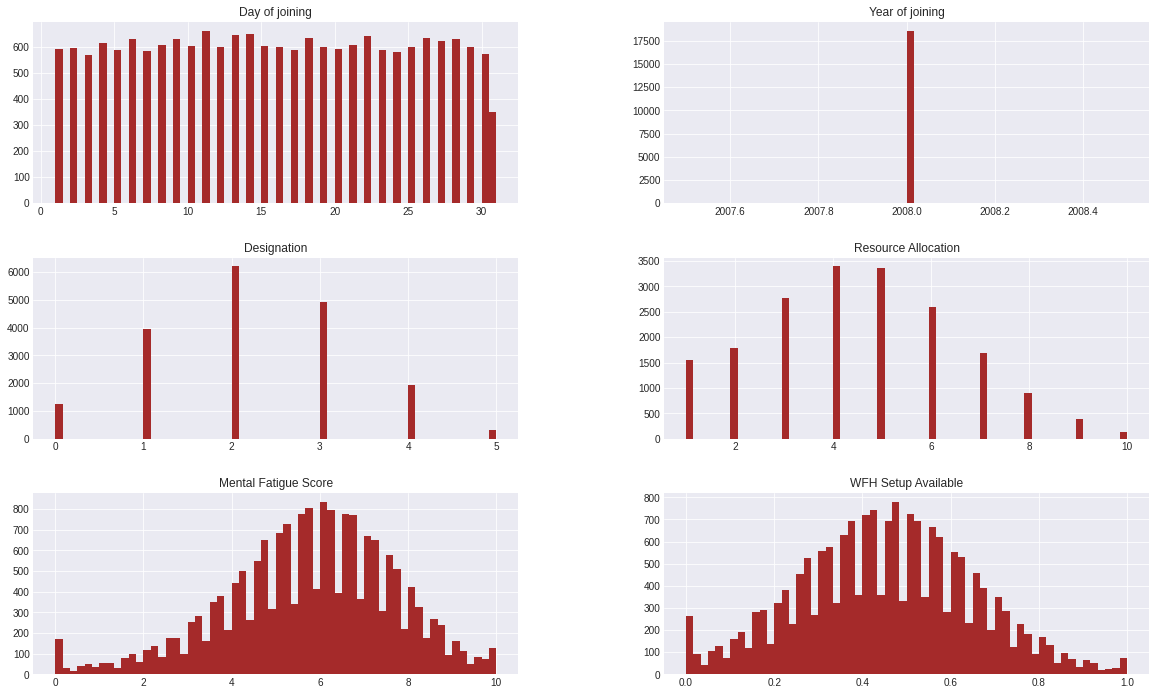

In [ ]:
df2.hist(bins=60, figsize=(20,12), color = 'brown')
plt.style.use('seaborn-whitegrid')
plt.title(col)
plt.show()

> **Histogram plot of all our categorical features**

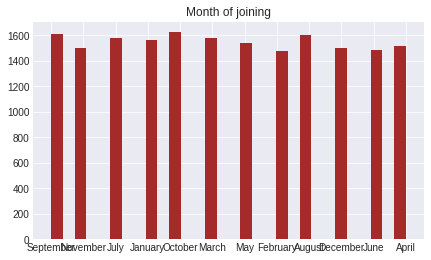

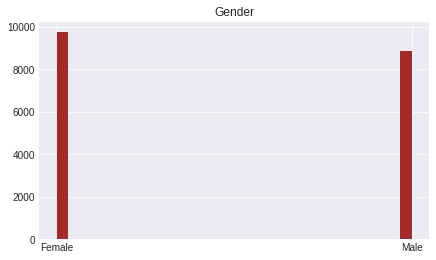

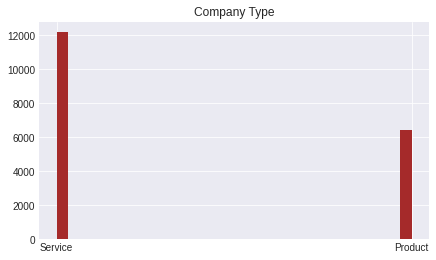

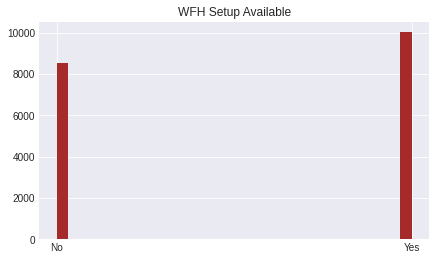

In [ ]:
cols = ['Month of joining', 'Gender', 'Company Type', 'WFH Setup Available']
for col in cols:
  plt.figure(figsize=(7,4))
  plt.style.use('seaborn-darkgrid')
  df2[col].hist(bins = 30, color = 'brown')
  plt.title(col)

> **Histogram plot of our target feature**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a87dd8bd0>]],
      dtype=object)

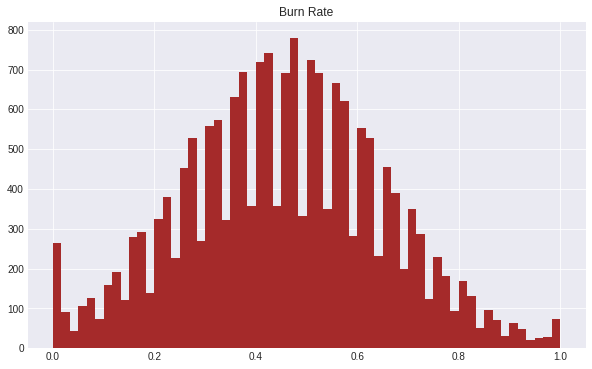

In [ ]:
df2[['Burn Rate']].hist(bins=60, figsize=(10,6), color = 'brown')

# **Bivarate Analysis**

> **Box plot to show the relationship between our target variable and the Designation**

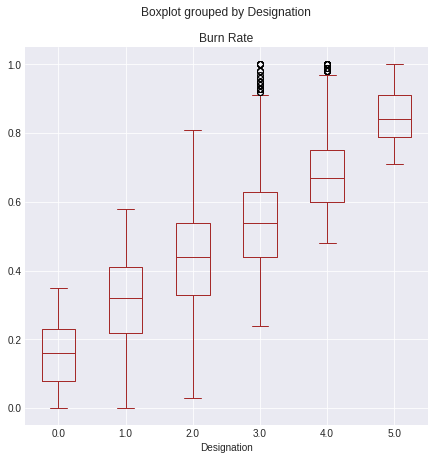

In [ ]:
df2.boxplot(column = 'Burn Rate', by = 'Designation', figsize = (7, 7), color = 'brown')

> **Box plot to show the relationship between our target variable and the resource Allocation**

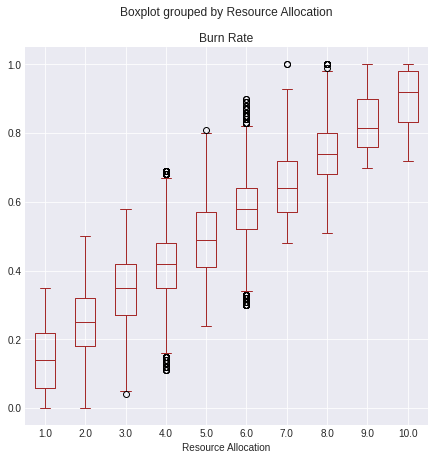

In [ ]:
df2.boxplot(column = 'Burn Rate', by = 'Resource Allocation', figsize = (7, 7), color = 'brown')

> **Box plot to show the relationship between our target variable and the Mental Fatigue Score**

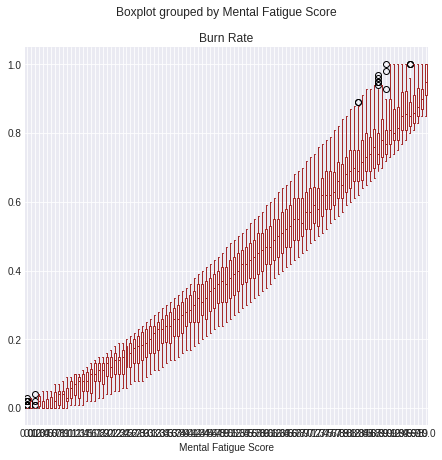

In [ ]:
df2.boxplot(column = 'Burn Rate', by = 'Mental Fatigue Score', figsize = (7, 7), color = 'brown')



---


Looking at the boxplot above, you would notice the plot is kind of too clustered and we can't gain deep insight on how the relationship changes, these issue will be dealt with by a method called Binning, where we cut or segment the continues values in a features into sepearate sections with uniform intervals


---



> **Box plot to show the relationship between our target variable and the rest of the categorical columns**

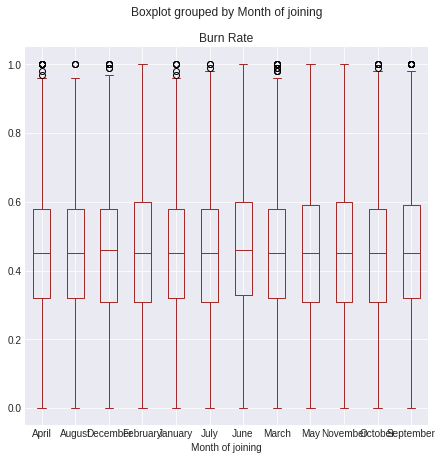

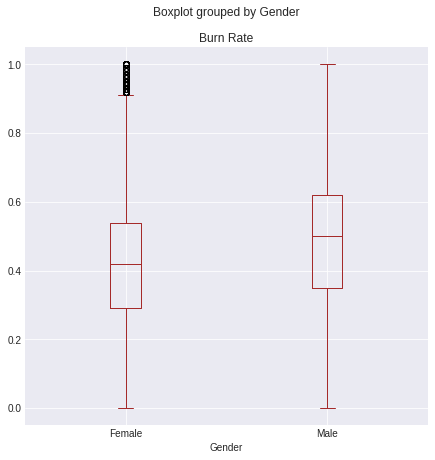

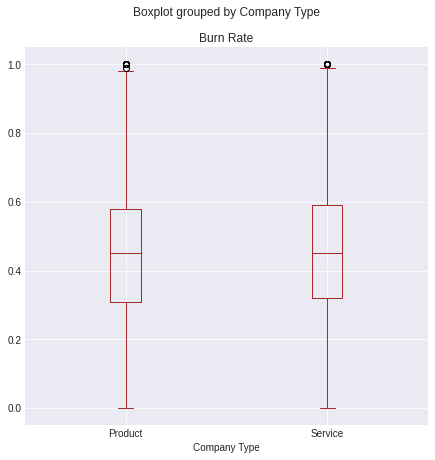

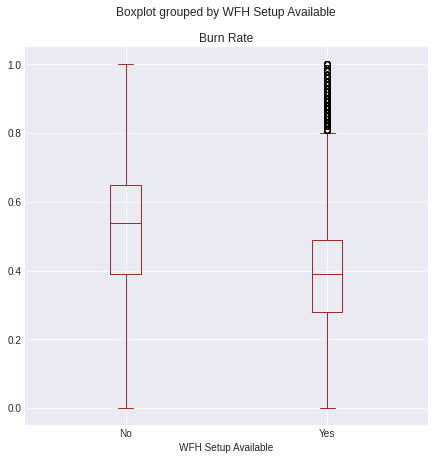

In [ ]:
cols2 = ['Gender', 'Company Type', 'WFH Setup Available',]
for col2 in cols:
  df2.boxplot(column = 'Burn Rate', by = col2, figsize = (7, 7), color = 'brown')

> **Binning method applied to our continue variable for a better analysis**

In [ ]:
df2['Burn Out Stage'] = pd.cut(df2['Burn Rate'], bins = [0., 0.2, 0.4, 0.6, 0.8, 1., ],labels =['HONEYMOON PHASE', 'ONSET OF STRESS', 'CHRONIC STRESS', 'BURNOUT', 'HABITUAL BURNOUT' ] )


In [ ]:
df2['Mental Fatigue Scale'] = pd.cut(df2['Mental Fatigue Score'], bins = [0., 2, 4, 6, 8, 10., ], labels =['No FATIGUE', 'MILD', 'MODERATE', 'SEVERE', 'VERY SEVERE'] )

In [ ]:
df2['Burn Out Stage'].unique()

['HONEYMOON PHASE', 'ONSET OF STRESS', 'CHRONIC STRESS', 'BURNOUT', 'HABITUAL BURNOUT', NaN]
Categories (5, object): ['HONEYMOON PHASE' < 'ONSET OF STRESS' < 'CHRONIC STRESS' < 'BURNOUT' <
                         'HABITUAL BURNOUT']

In [ ]:
df2['Mental Fatigue Scale'].unique()

['MILD', 'MODERATE', 'SEVERE', 'No FATIGUE', 'VERY SEVERE', NaN]
Categories (5, object): ['No FATIGUE' < 'MILD' < 'MODERATE' < 'SEVERE' < 'VERY SEVERE']



---


From the above results you would see that the new columns added to our dataframe are sections interval from a some continues columns in our initial dataset set, for instance 
 * **HONEYMOON PHASE** are value range from 0.0 - 0.2 in our Burn out stage columns
 * **ONSET OF STRESS** = 0.2 - 0.4
 * **CHRONIC STRESS** = 0.4 - 0.6
 * **BURNOUT** = 0.6 - 0.8
 * **HABITUAL BURNOUT** = 0.8 - 1.0
 
 They are also grouped ordianlly with -'No FATIGUE' < 'MILD' < 'MODERATE' < 

'SEVERE' < 'VERY SEVERE'

 Same applies with the Mental fatigue **Score** and Mental fatigue **Scale**

 ---


> **Burn Out Stage Count plot**

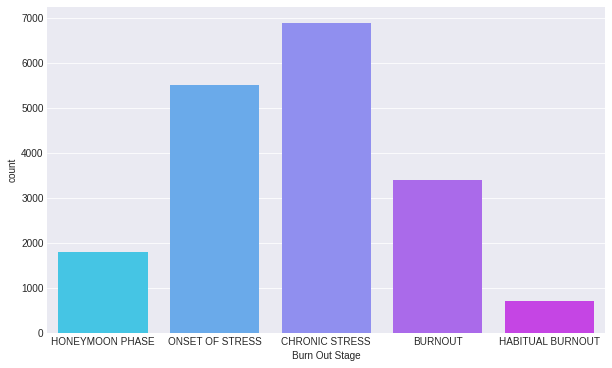

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df2['Burn Out Stage'] , palette= 'cool')

> **Mental Fatigue Scale Count plot**

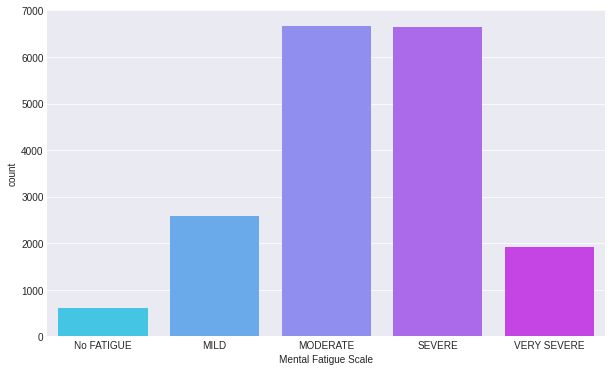

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df2['Mental Fatigue Scale'] , palette= 'cool')



---



>**Countplot showing the relationship between the company type and the Designation**

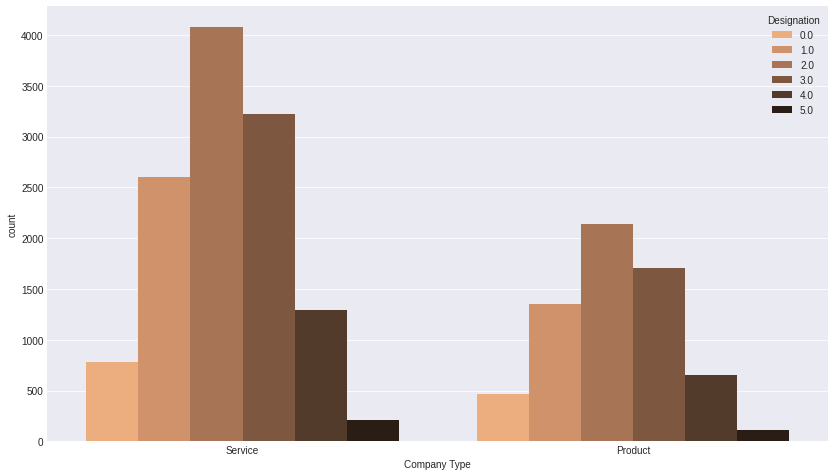

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='Company Type', hue= 'Designation', data=df2, palette = 'copper_r')


>**Countplot showing the relationship between the company type and the Mental Fatigue Score**

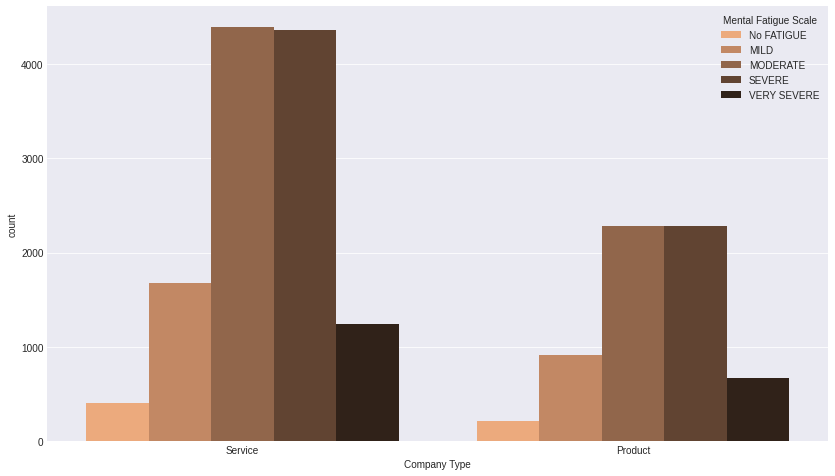

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='Company Type', hue= 'Mental Fatigue Scale', data=df2, palette = 'copper_r')

> **We make a duplicated copy of our data again before further manipulation**

In [ ]:
df3 = df2.copy()

In [ ]:
df3.dtypes

Day of joining             int64
Month of joining          object
Year of joining            int64
Gender                    object
Company Type              object
WFH Setup Available       object
Designation              float64
Resource Allocation      float64
Mental Fatigue Score     float64
Burn Rate                float64
Burn Out Stage          category
Mental Fatigue Scale    category
dtype: object

> **Convert the two columns with category as their data type to a string**


In [ ]:
df3['Burn Out Stage'].apply(np.str)
df3['Mental Fatigue Scale'].apply(np.str)

0            MILD
1        MODERATE
2            MILD
3          SEVERE
4            MILD
           ...   
18585    MODERATE
18586      SEVERE
18587      SEVERE
18588    MODERATE
18589      SEVERE
Name: Mental Fatigue Scale, Length: 18590, dtype: category
Categories (5, object): ['No FATIGUE' < 'MILD' < 'MODERATE' < 'SEVERE' < 'VERY SEVERE']

Text(0.5, 1.0, 'A countplot between Mental Fatigue Scale and Burn Out Stage')

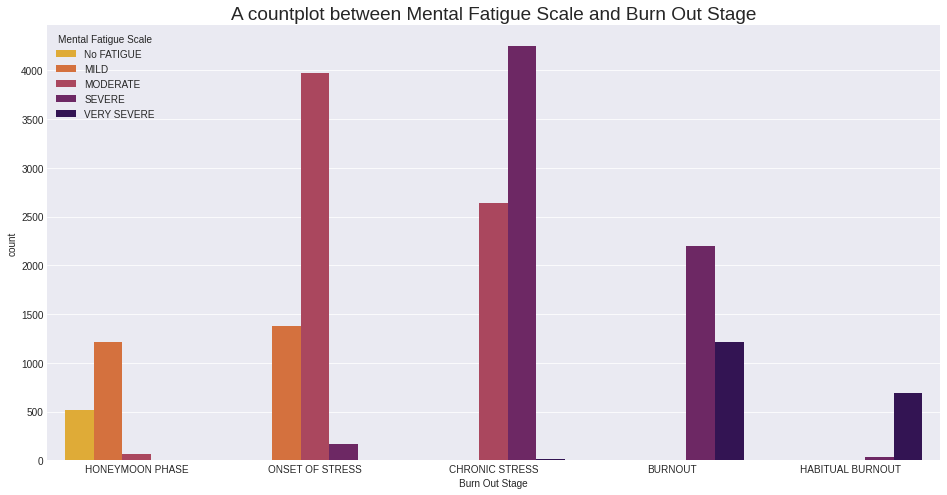

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(hue='Mental Fatigue Scale', x= 'Burn Out Stage', data=df3, palette = 'inferno_r')
plt.title('A countplot between Mental Fatigue Scale and Burn Out Stage', fontdict={'fontsize':19})

>**A function that does a countplot with each of our indicated column with the target variable**

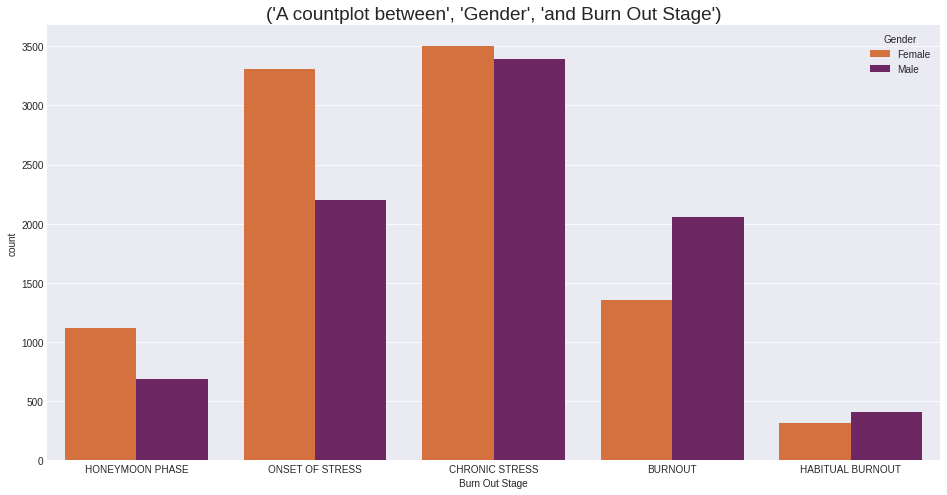

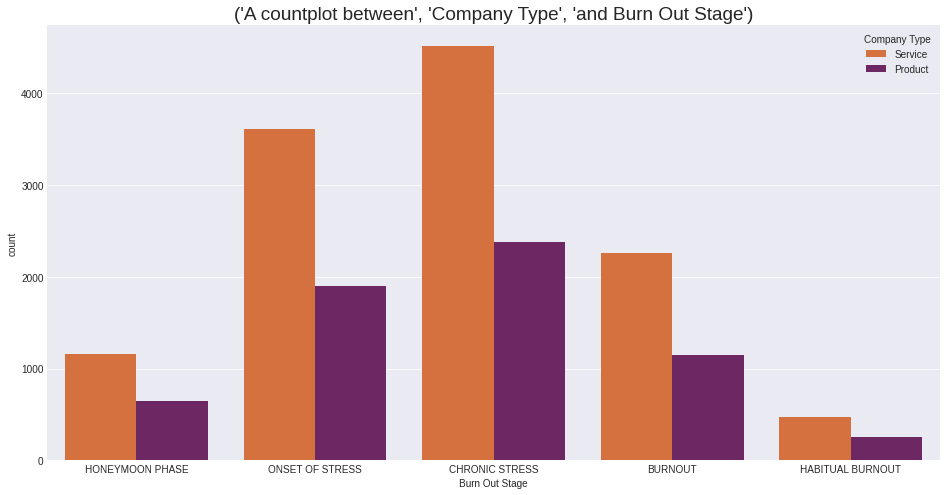

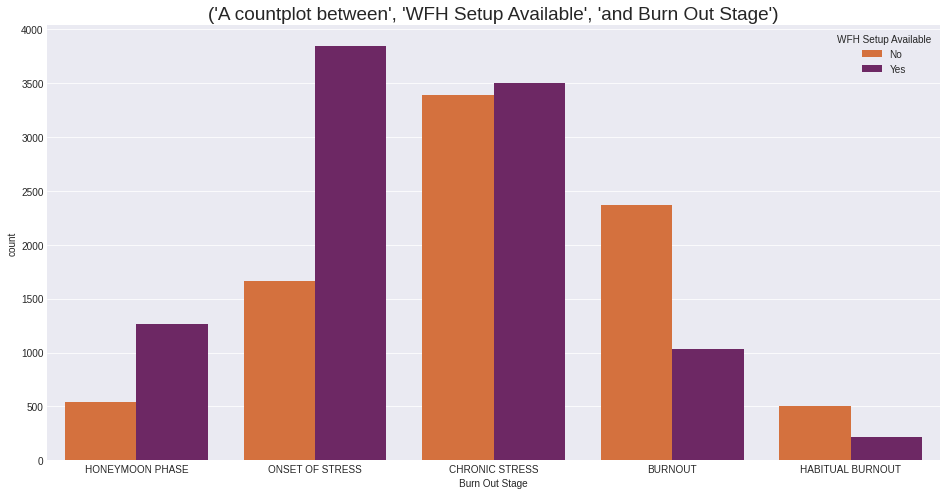

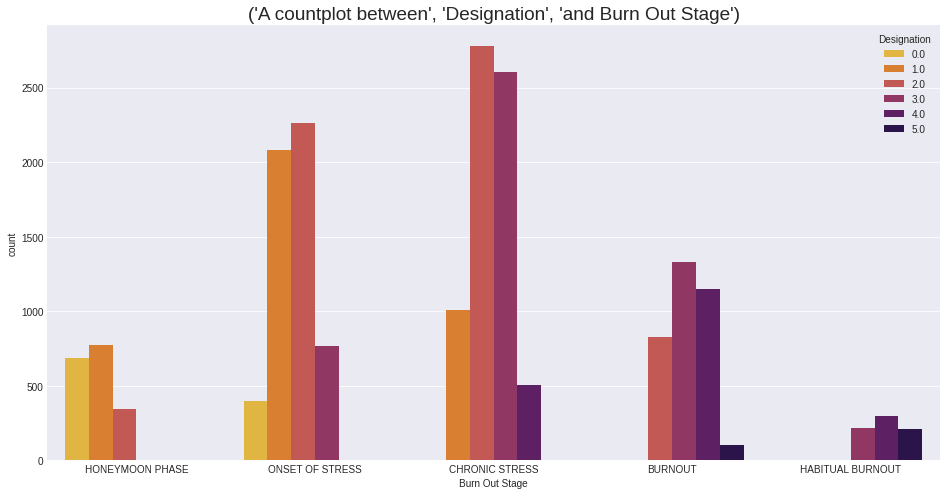

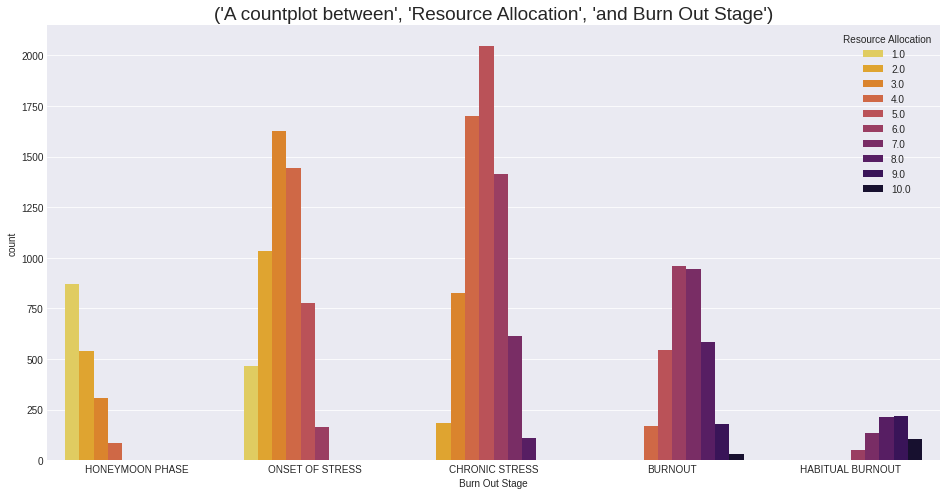

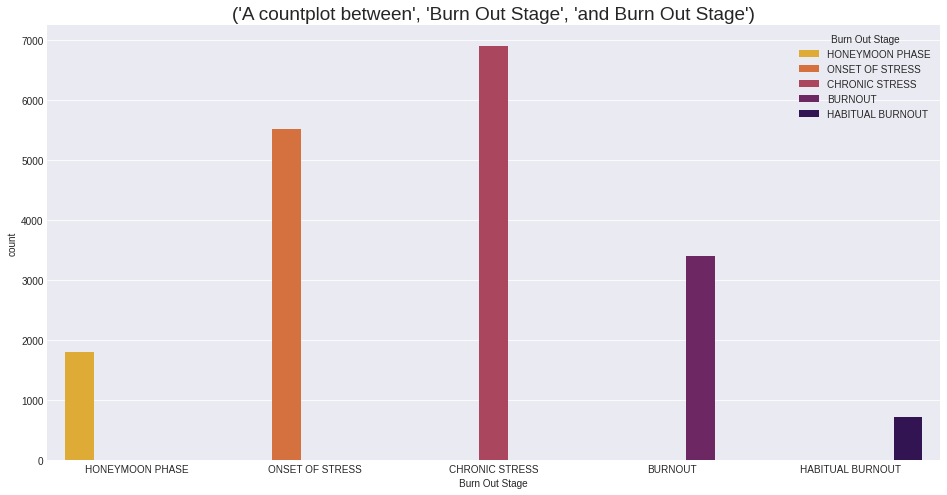

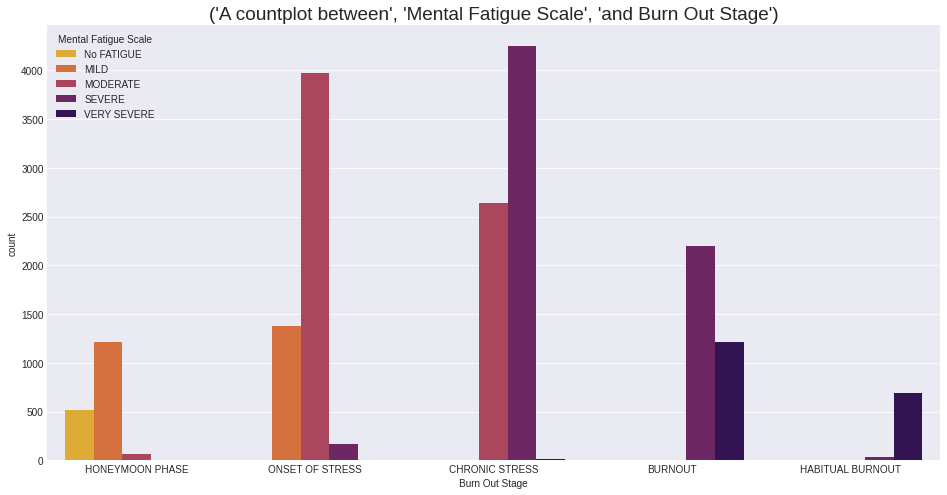

In [ ]:
cols3 = [  'Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation',  'Burn Out Stage', 'Mental Fatigue Scale']
for col3 in cols3:  
  plt.figure(figsize=(16,8))
  sns.countplot(hue=df3[col3], x= 'Burn Out Stage', data=df3, palette = 'inferno_r')
  plt.title(label =('A countplot between',col3, 'and Burn Out Stage'), fontdict={'fontsize':19})

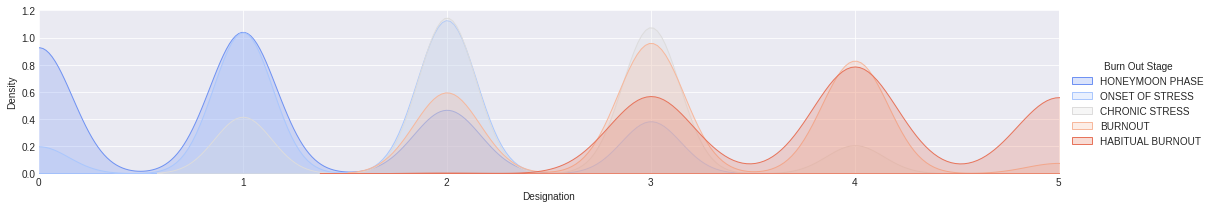

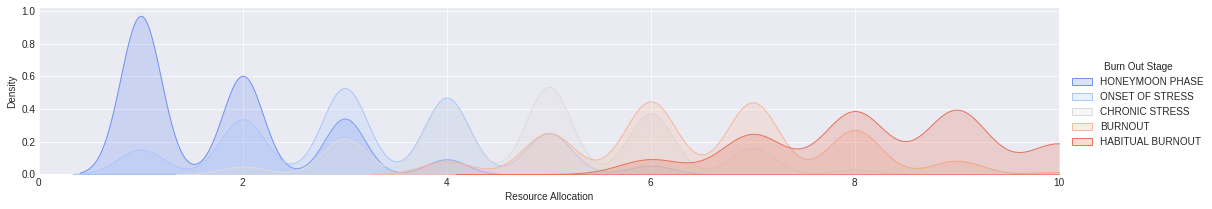

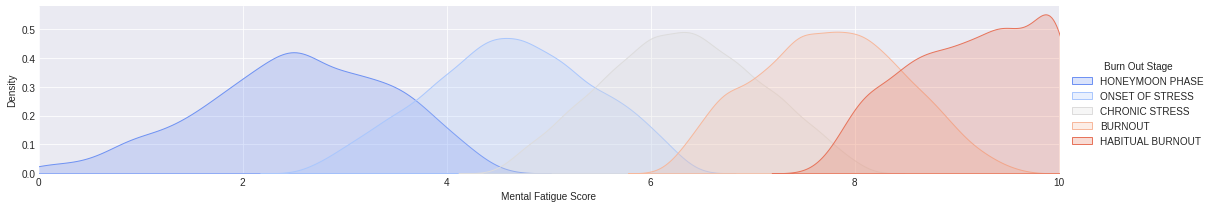

In [ ]:
cols4 = ['Designation', 'Resource Allocation', 'Mental Fatigue Score']
for col4 in cols4:
    fig1 = sns.FacetGrid(df3 ,hue = 'Burn Out Stage', aspect = 5, palette = 'coolwarm')
    fig1.map(sns.kdeplot, col4, shade = True)
    oldest = df3[col4].max()
    fig1.set(xlim=(0,oldest))
    fig1.add_legend()

In [ ]:
df3.columns

Index(['Day of joining', 'Month of joining', 'Year of joining', 'Gender',
       'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate',
       'Burn Out Stage', 'Mental Fatigue Scale'],
      dtype='object')

# Multivariate Analysis

> **A seaborn implot showing the relationship between the Mental Fatigue Score, Designation and the target variable Burn Rate**

Text(0.5, 1.0, 'An implot showing the relationship between Mental Fatigue Scale, Designation and Burn Out Stage')

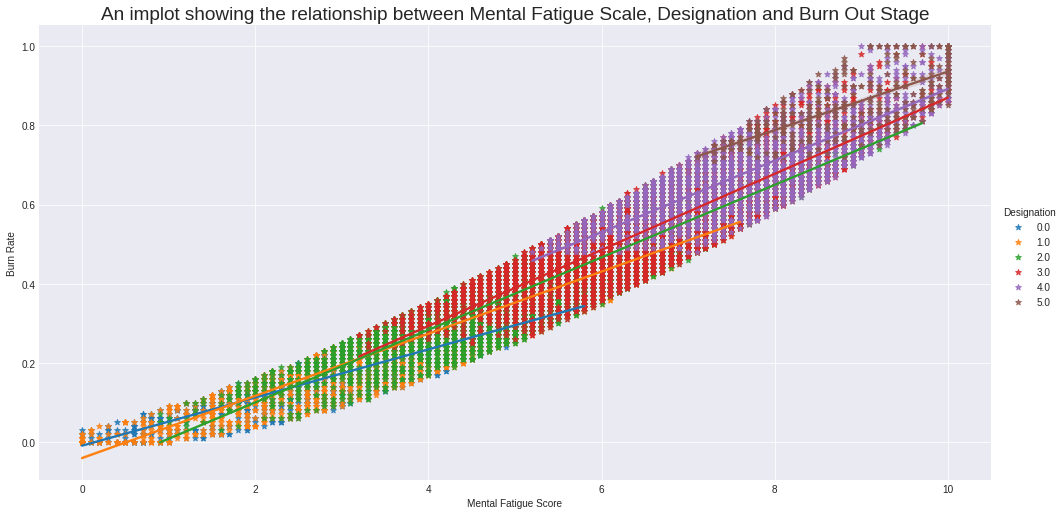

In [ ]:
sns.lmplot(data = df3, x = 'Mental Fatigue Score', y = 'Burn Rate', markers = '*', aspect = 2, hue = 'Designation', legend_out = True, height = 7)
plt.title('An implot showing the relationship between Mental Fatigue Scale, Designation and Burn Out Stage', fontdict={'fontsize':19})

---

> **A seaborn implot showing the relationship between the Resource Allocation, Mental Fatigue Scale and the Burn Rate**

Text(0.5, 1.0, 'An implot showing the relationship between Resource Allocation, Mental fatigue Scale and Burn Out Stage')

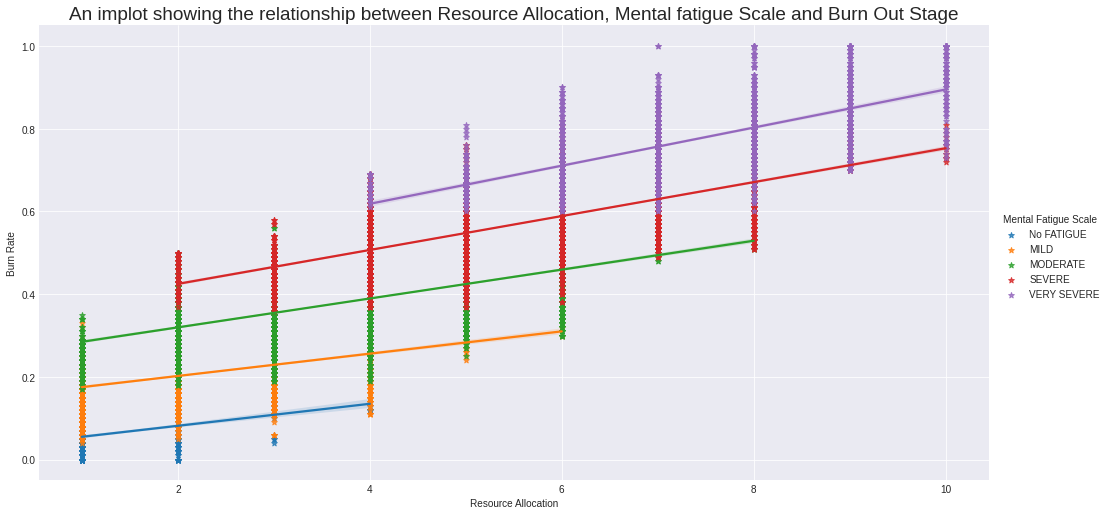

In [ ]:
sns.lmplot(data = df3, x = 'Resource Allocation', y = 'Burn Rate', markers = '*', aspect = 2, hue = 'Mental Fatigue Scale', legend_out = True, height = 7)
plt.title('An implot showing the relationship between Resource Allocation, Mental fatigue Scale and Burn Out Stage', fontdict={'fontsize':19})

---
> **A seaborn implot showing the relationship between the Designation, Resource Allocation and the target variable Burn Rate**

Text(0.5, 1.0, 'An implot showing the relationship between Designation, Resource Allocation, and Burn Out Stage')

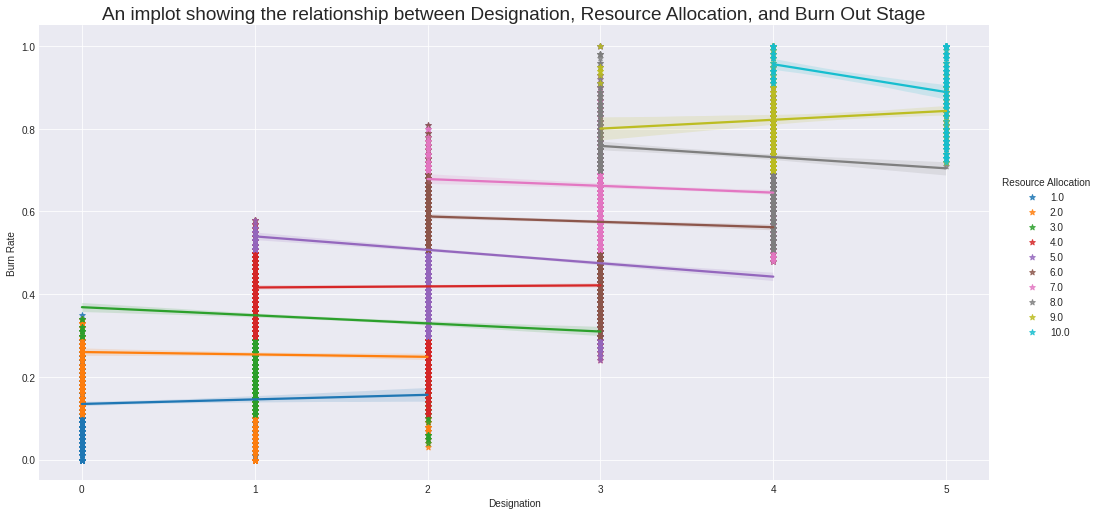

In [ ]:
sns.lmplot(data = df3, x = 'Designation', y = 'Burn Rate', markers = '*', aspect = 2, hue = 'Resource Allocation', legend_out = True, height = 7)
plt.title('An implot showing the relationship between Designation, Resource Allocation, and Burn Out Stage', fontdict={'fontsize':19})

---
>**Now we drop the less important features in order to plot a pairplot to see the relationship between each feature with another at glance.**
>> Note: We will also drop the Gender, Company Type and WFH Setup available, not because they are not important, but because they only contain two unique values and a pairplot with it won't give any valuable insight, also due to the computational complexity in making a pairplot.

In [ ]:
df3.drop(['Day of joining', 'Month of joining', 'Year of joining', ], axis = 1, inplace = True)
pairplot_df= df3.drop(['Gender', 'Company Type', 'WFH Setup Available'], axis = 1)

In [ ]:
pairplot_df.head(2)

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Burn Out Stage,Mental Fatigue Scale
0,2.0,3.0,3.8,0.16,HONEYMOON PHASE,MILD
1,1.0,2.0,5.0,0.36,ONSET OF STRESS,MODERATE




---
>**A pairplot to show the relationship between each feature with another and using a coloration (hue) to show the Burn Out Stages**



Text(0.5, 1.09, 'A pairplot to show the relationship between each feature and another')

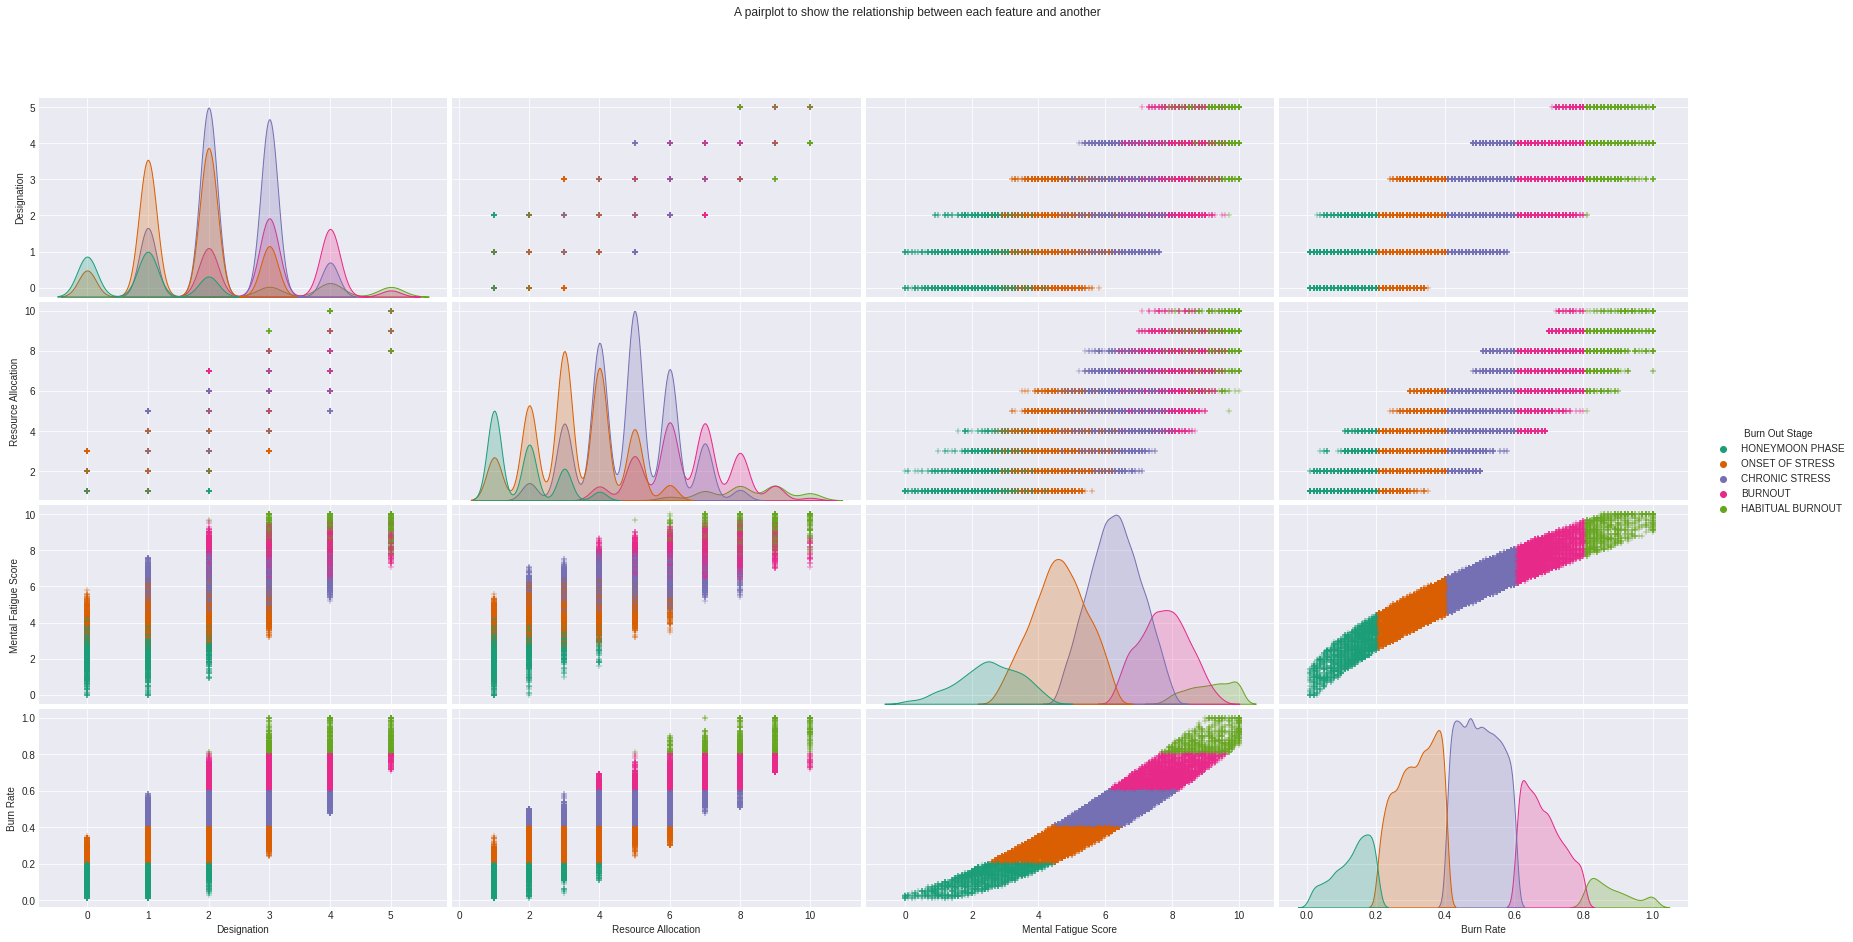

In [ ]:
sns.pairplot(pairplot_df, hue = 'Burn Out Stage', palette ='Dark2', aspect =2 , height = 3, markers = '+').fig.suptitle('A pairplot to show the relationship between each feature and another', y=1.09)


---
>**We drop the added columns since we are done using them**

In [ ]:
df3.drop(['Burn Out Stage', 'Mental Fatigue Scale'], axis = 1, inplace = True)

---
>**We encode our categorical to colmuns to numeric,to enable us plot the heat map (plasma soup plot)**

In [ ]:
df3['Gender'] = df3['Gender'].replace(('Female', 'Male'), (0, 1))
df3['Company Type'] = df3['Company Type'].replace(('Service', 'Product'), (1, 0))
df3['WFH Setup Available'] = df3['WFH Setup Available'].replace(('Yes', 'No'), (0, 1))
df3.head(3)


,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,1,2.0,3.0,3.8,0.16
1,1,1,0,1.0,2.0,5.0,0.36
2,1,1,0,1.0,1.0,2.6,0.20


In [ ]:
corrmat = df3.corr()

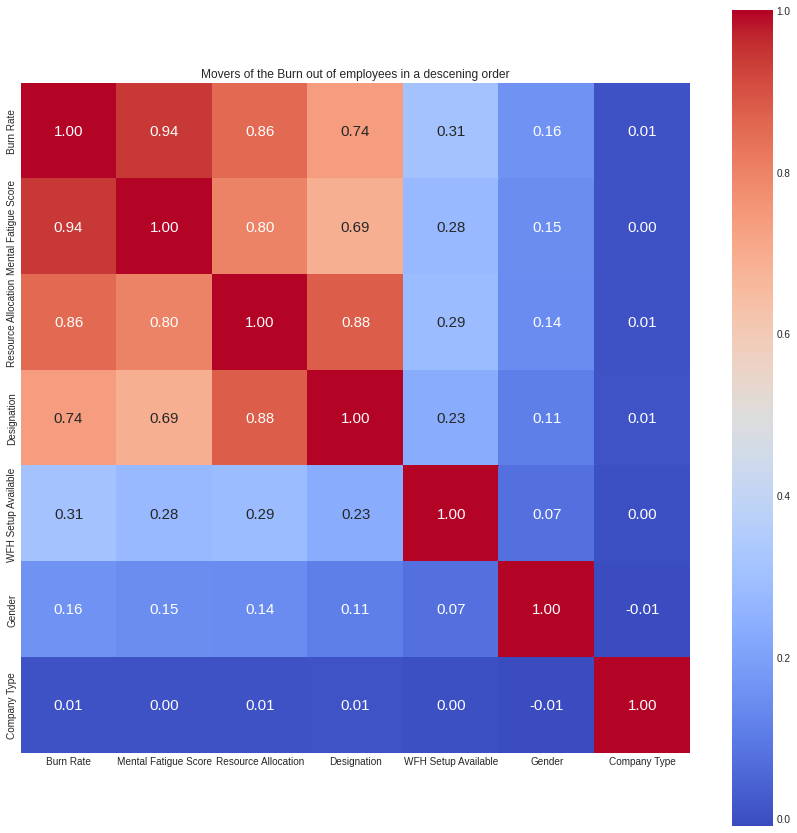

In [ ]:
k = 7 
plt.figure(figsize=(15,15))
plt.title('Movers of the Burn out of employees in a descening order')
cols = corrmat.nlargest(k, 'Burn Rate')['Burn Rate'].index
cm = np.corrcoef(df3[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values, cmap = 'coolwarm')
plt.show()

In [ ]:
cols6 = corrmat.nlargest(k, 'Burn Rate')['Burn Rate']
cols6

Burn Rate               1.000000
Mental Fatigue Score    0.944389
Resource Allocation     0.855005
Designation             0.736412
WFH Setup Available     0.307168
Gender                  0.156577
Company Type            0.005904
Name: Burn Rate, dtype: float64



---

Both from the heatmap and the code above, we could clearly see that the feature with the most correlation (top mover) with our target is the Mental Fatigue Score having a correlation values of 0.94, followed by the Resource Allocation with correlation value of 0.86 approx. and the last on the list is the company type with a correlation value of 0.01 approx.


---







In [ ]:
X = df3.copy()
Y = X.pop('Burn Rate')

**Mutual_info_regression**
>The heatmap above mostly captured the linear relationship between, the feature and the target, now in a case where there might be a non-linear relationship between the target and the predictors, the heatmap correlation plot might not be also to capture those sorts of relationship, instead we could use the features dependencies since a relationship does not have to be linear for two variables to be dependant. This means that this metric can be used to highlight non-linear relationships.

In [ ]:
discrete_features = X.dtypes == int

In [ ]:
discrete_features.dtypes

dtype('bool')

In [ ]:
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores  # show a few features with their MI scores

Mental Fatigue Score    1.327649
Resource Allocation     0.703180
Designation             0.439948
WFH Setup Available     0.079297
Gender                  0.016499
Company Type            0.000000
Name: MI Scores, dtype: float64

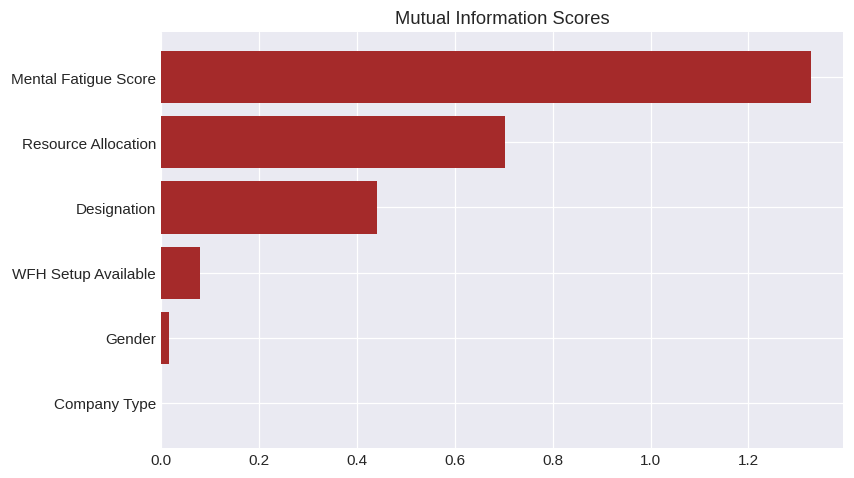

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.style.use('seaborn-darkgrid')
    plt.barh(width, scores, color = 'brown')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    

plt.figure(dpi=110, figsize=(8, 5))
plot_mi_scores(mi_scores)



---



>**Feature Encoding (OneHot Encoding)**
>> * Using the get_dummies() pandas module

In [ ]:
df4= pd.get_dummies(data=X, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first = True)

>>* New features have been added, in respect to the present or absence of a unique instance in the parent feature. 


In [ ]:
df4.head(2)

,Designation,Resource Allocation,Mental Fatigue Score,Gender_1,Company Type_1,WFH Setup Available_1
0,2.0,3.0,3.8,0,1,1
1,1.0,2.0,5.0,1,1,0


In [ ]:
df4.dtypes

Designation              float64
Resource Allocation      float64
Mental Fatigue Score     float64
Gender_1                   uint8
Company Type_1             uint8
WFH Setup Available_1      uint8
dtype: object

>> * The New columns formed are of the data types - unit8

>> **To check the distribution of our data**

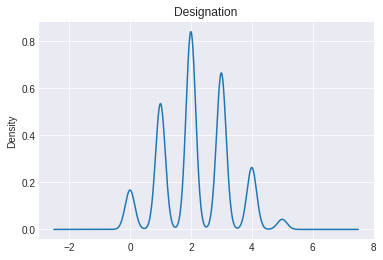

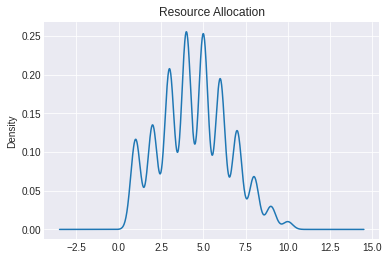

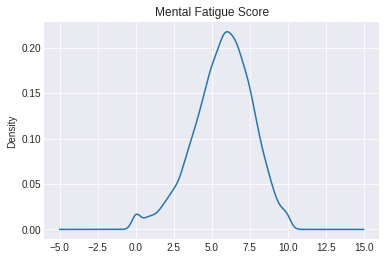

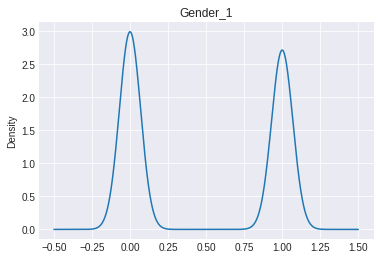

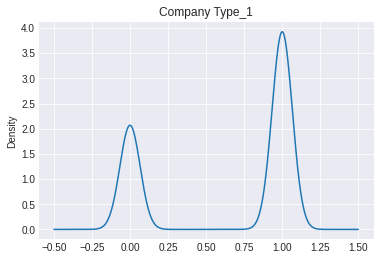

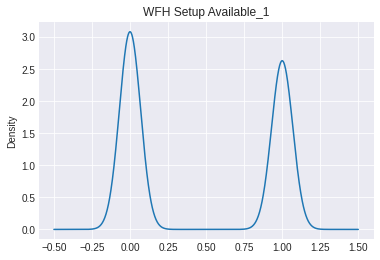

In [ ]:
for col5 in df4.columns.to_list(): 
  if df4[col5].dtypes =='float64' or 'int' or 'unit8':
    plt.style.use('seaborn-darkgrid')
    df4[col5].plot(kind= 'density')
    plt.title(col5)
    plt.show()

In [ ]:
df4.isna().sum()

Designation              0
Resource Allocation      0
Mental Fatigue Score     0
Gender_1                 0
Company Type_1           0
WFH Setup Available_1    0
dtype: int64

>> * We could notice that it's just the Mental Fatigue Score and the Burn rate that have a Giuassian Normal distribution( bell shape), the other features have various peaks.

In [ ]:
X2 = df4
Y2 = Y

In [ ]:
minmaxscaler = MinMaxScaler(feature_range = (0,1))
scaled_X2 = minmaxscaler.fit_transform(X2)
scaledx2 = pd.DataFrame((scaled_X2), columns = X2.columns)

In [ ]:
scaledx2.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Gender_1,Company Type_1,WFH Setup Available_1
count,18590.00000,18590.000000,18590.000000,18590.000000,18590.000000,18590.000000
mean,0.43588,0.387395,0.573217,0.475686,0.654868,0.460463
std,0.22663,0.227205,0.192055,0.499422,0.475424,0.498448
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.20000,0.222222,0.460000,0.000000,0.000000,0.000000
50%,0.40000,0.333333,0.590000,0.000000,1.000000,0.000000
75%,0.60000,0.555556,0.710000,1.000000,1.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaler = StandardScaler()
rescaled_X2 = scaler.fit_transform(X2)
RescaledX1 = pd.DataFrame(rescaled_X2,  columns = X2.columns)

In [ ]:
RescaledX1.isna().sum()

Designation              0
Resource Allocation      0
Mental Fatigue Score     0
Gender_1                 0
Company Type_1           0
WFH Setup Available_1    0
dtype: int64

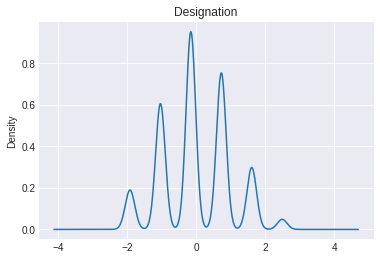

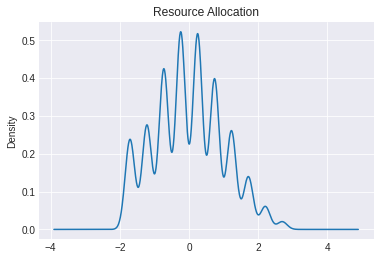

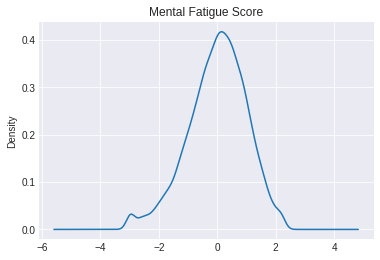

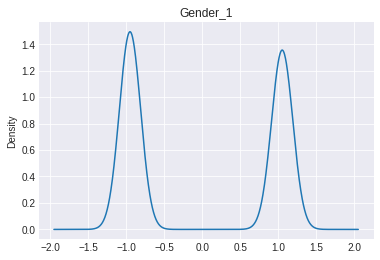

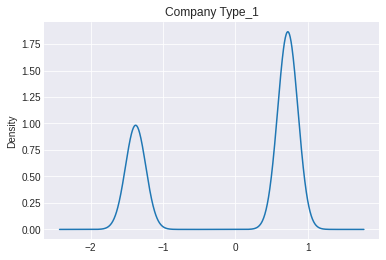

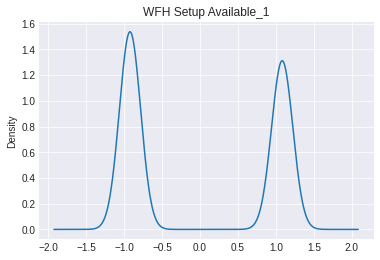

In [ ]:
for col5 in RescaledX1.columns.to_list(): 
  if RescaledX1[col5].dtypes =='float64' or 'int' or 'unit8':
    plt.style.use('seaborn-darkgrid')
    RescaledX1[col5].plot(kind= 'density')
    plt.title(col5)
    plt.show()

In [ ]:
RescaledX1.isna().sum()

Designation              0
Resource Allocation      0
Mental Fatigue Score     0
Gender_1                 0
Company Type_1           0
WFH Setup Available_1    0
dtype: int64

# **MODEL BUILDING AND EVALUATION**



---


>> **Split the Data into train and validation set**




In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(scaledx2, Y, test_size = .20,  random_state =4 )

In [ ]:
k = 3
kf = KFold(n_splits= k, random_state = 14 ,shuffle = True)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_val)
print('R^2 value: ', round(r2_score(Y_val, pred),3))
RMSE = np.sqrt(mean_squared_error(Y_val, pred))
print('RMSE Value: ',round(RMSE,3))

R^2 value:  0.922
RMSE Value:  0.055


In [ ]:
linearreg_pred = cross_val_predict(model, scaledx2, Y, cv=kf)

In [ ]:
Y

0        0.16
1        0.36
2        0.20
3        0.52
4        0.29
         ... 
18585    0.48
18586    0.54
18587    0.59
18588    0.52
18589    0.61
Name: Burn Rate, Length: 18590, dtype: float64

In [ ]:
plot1= pd.DataFrame(Y)

In [ ]:
plot1['linearreg_pred'] = pd.DataFrame(linearreg_pred)

In [ ]:
plot1

,Burn Rate,linearreg_pred
0,0.16,0.271882
1,0.36,0.330289
2,0.20,0.124257
3,0.52,0.610916
4,0.29,0.278486
...,...,...
18585,0.48,0.427507
18586,0.54,0.563035
18587,0.59,0.555731
18588,0.52,0.484785


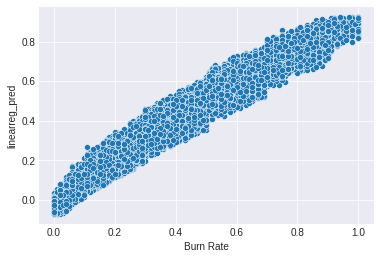

In [ ]:
sns.scatterplot(data = plot1, x= 'Burn Rate', y = 'linearreg_pred')

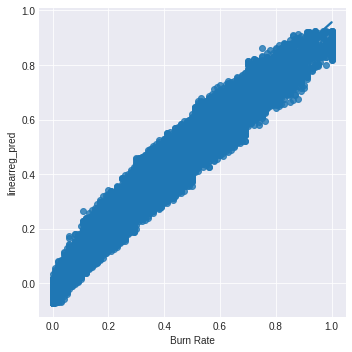

In [ ]:
sns.lmplot(data = plot1, x= 'Burn Rate', y = 'linearreg_pred')

In [ ]:
polynomial_linearRegression = Pipeline([
("poly_features", PolynomialFeatures(degree=6, include_bias=False)),
("lin_reg", LinearRegression())])

In [ ]:
polynomial_linearRegression.fit(X_train, Y_train)
pred1 = polynomial_linearRegression.predict(X_val)
score = r2_score( Y_val, pred1)
print('r2_score: {}'.format(score))
RMSE1 = np.sqrt(mean_squared_error(Y_val, pred1))
print('RMSE Value: ',round(RMSE,3))

r2_score: 0.9289402873197705
RMSE Value:  0.055


In [ ]:
poly_linearreg_pred = cross_val_predict(polynomial_linearRegression, scaledx2, Y, cv=kf)

In [ ]:
plot1['polylinearreg_pred'] = pd.DataFrame(poly_linearreg_pred)

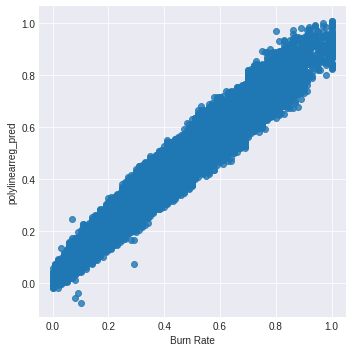

In [ ]:
sns.lmplot(data = plot1, x= 'Burn Rate', y = 'polylinearreg_pred')

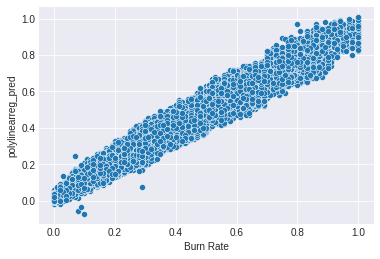

In [ ]:
sns.scatterplot(data =plot1 , x= 'Burn Rate', y = 'polylinearreg_pred')

In [ ]:
polynomial_RandomForest = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("clf", RandomForestRegressor(n_estimators = 700, n_jobs = -1 ))])

In [ ]:
polynomial_RandomForest.fit(X_train, Y_train)
poly_randomForest_pred = cross_val_predict(polynomial_linearRegression, scaledx2, Y, cv=kf)
score2 = r2_score(Y, poly_randomForest_pred)
print('r2_score with the test: {}'.format(score2))
RMSE3 = np.sqrt(mean_squared_error(Y, poly_randomForest_pred))
print('RMSE Value: ',round(RMSE3,3))

r2_score with the test: 0.9274034962699638
RMSE Value:  0.053


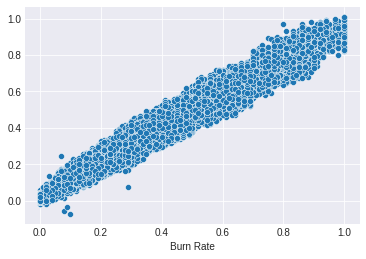

In [ ]:
sns.scatterplot(x = Y, y = poly_randomForest_pred)

In [ ]:
xgb_class = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators = 500)
xgb_class.fit(X_train, Y_train)
xgb_pred = cross_val_predict(xgb_class, scaledx2, Y, cv=kf)
xgb_result1 = r2_score(Y, xgb_pred)
print('r2_score: {}'.format(xgb_result1))
RMSE4 = np.sqrt(mean_squared_error(Y, xgb_pred))
print('RMSE Value: ',round(RMSE4,3))

r2_score: 0.928341884966895
RMSE Value:  0.053


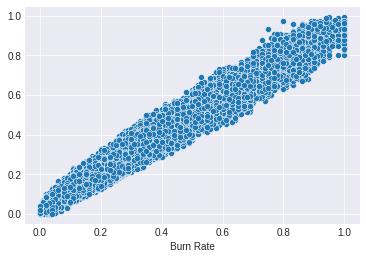

In [ ]:
sns.scatterplot(x= Y, y = xgb_pred)

In [ ]:
import joblib
import pickle


In [ ]:
filename1 = 'linearreg.sav'
pickle.dump(model, open(filename1, 'wb'))

In [ ]:
loaded_model1 = pickle.load(open(filename1, 'rb'))
result = loaded_model1.score(X_val, Y_val)
print(result)

0.9223727240308812


In [ ]:
filename2 = 'polynomial_linearreg2.pkl'
pickle.dump(polynomial_linearRegression, open(filename2, 'wb'))

In [ ]:
loaded_model2 = pickle.load(open(filename2, 'rb'))
result2 = loaded_model2.score(X_val, Y_val)
print(result2)

0.9289402873197705


In [ ]:
polynomial_lgbm = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lgb_model", lgb.LGBMRegressor(n_estimators = 500))])

In [ ]:

polynomial_lgbm.fit(X_train, Y_train)
lgb_pred = cross_val_predict(polynomial_lgbm, scaledx2, Y, cv=kf)
plgb_result = r2_score(Y, lgb_pred)
RMSE6 = np.sqrt(mean_squared_error(Y, lgb_pred))
print('RMSE Value: ',round(RMSE6,3))
print('r2_score: {}'.format(plgb_result))

RMSE Value:  0.055
r2_score: 0.9232017589108094


In [ ]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
scaledx2_poly = poly_features.fit_transform(scaledx2)

In [ ]:
GBR_model = GradientBoostingRegressor(n_estimators = 300, max_depth =6)
gbr_pred = cross_val_predict(GBR_model, scaledx2_poly, Y, cv=kf)
pgbr_result = r2_score(Y, gbr_pred)
RMSE7 = np.sqrt(mean_squared_error(Y, gbr_pred))
print('RMSE Value: ',round(RMSE7,3))
print('r2_score: {}'.format(pgbr_result))

RMSE Value:  0.055
r2_score: 0.9221221720390795


In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, BatchNormalization
from keras import metrics

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(33, input_dim= 6))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu', use_bias= False))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'relu',  use_bias = False))
model.add(BatchNormalization())
model.add(Dense(3, activation = 'relu',  use_bias = False))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 33)                231       
                                                                 
 batch_normalization_12 (Bat  (None, 33)               132       
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
 batch_normalization_13 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 10)                100       
                                                                 
 batch_normalization_14 (Bat  (None, 10)              

In [ ]:
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=60,
restore_best_weights=True)

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=learning_rate, decay=weight_decay, nesterov=True)

In [ ]:
model.compile(loss="mse", optimizer= sgd,  metrics=[ 'mae', 'mse'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=2000, validation_data=(X_val, Y_val), callbacks = early_stopping_cb)

Epoch 1/2000
465/465 [==============================] - 24s 2ms/step - loss: 0.0342 - mae: 0.1400 - mse: 0.0342 - val_loss: 0.0116 - val_mae: 0.0866 - val_mse: 0.0116
Epoch 2/2000
465/465 [==============================] - 1s 1ms/step - loss: 0.0135 - mae: 0.0929 - mse: 0.0135 - val_loss: 0.0076 - val_mae: 0.0702 - val_mse: 0.0076
Epoch 3/2000
465/465 [==============================] - 1s 1ms/step - loss: 0.0110 - mae: 0.0840 - mse: 0.0110 - val_loss: 0.0067 - val_mae: 0.0654 - val_mse: 0.0067
Epoch 4/2000
465/465 [==============================] - 1s 1ms/step - loss: 0.0103 - mae: 0.0812 - mse: 0.0103 - val_loss: 0.0062 - val_mae: 0.0626 - val_mse: 0.0062
Epoch 5/2000
465/465 [==============================] - 1s 1ms/step - loss: 0.0099 - mae: 0.0792 - mse: 0.0099 - val_loss: 0.0060 - val_mae: 0.0619 - val_mse: 0.0060
Epoch 6/2000
465/465 [==============================] - 1s 1ms/step - loss: 0.0095 - mae: 0.0777 - mse: 0.0095 - val_loss: 0.0060 - val_mae: 0.0615 - val_mse: 0.0060
Epo

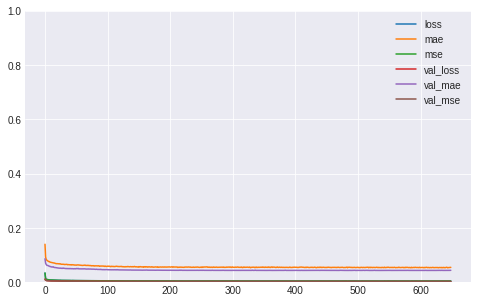

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
Neuralnet_RMSE = np.sqrt(0.0029)
Neuralnet_RMSE

0.053851648071345036